<a href="https://colab.research.google.com/github/ignazioloyola/t-bank-smart-planner/blob/main/T%E2%80%91Bank_Smart_Planner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **T-Bank Smart Planner - Project Specification**

## Write the “T‑Bank Smart Planner” Project Specification

Create a concise, well‑structured specification document (PDF or shared Google Doc) that captures the entire scope of the Smart Planner feature. The document should include: a brief executive summary of the project’s purpose and expected business impact; clearly defined user personas (Casual and Business) with their goals and pain points; a set of user stories grouped by persona, each written in the “As a … I want … so that …” format and accompanied by acceptance criteria; the key quantitative and qualitative success metrics; a short list of non‑functional requirements (usability, performance, security, integration); and a simple state‑transition diagram describing task statuses (New → In Waiting → In Progress → Completed/Cancelled → Archived) plus any optional transitions (e.g., Postponed, Paused). End with a MoSCoW‑style prioritisation table and a brief risk‑mitigation matrix.

Follow the company style guide (headings, bullet points, page numbers) and keep the whole specification to **no more than three pages** (excluding optional appendices). After drafting, circulate the document to the Product Owner, UX Lead, and Engineering Lead for a quick review, incorporate their feedback, and then publish the final version as version 1.0 in the project’s shared folder. This concise spec will serve as the single source of truth for design, development, and QA teams to build the Smart Planner feature.

## 1. Project Goal and Effectiveness Assessment

**Goal**  
Create a convenient task-scheduler within the T-Bank app that helps users plan their tasks while increasing engagement with the bank’s services.

**Key Metrics**

- *Quantitative*
  - Number of active scheduler users  
  - Percentage of users who use bank services through the scheduler  
  - Revenue growth from service sales  
  - Average transaction amount for services purchased via the scheduler  

- *Qualitative*
  - User satisfaction with the new functionality (surveys, reviews)  
  - Level of user engagement (frequency of use, depth of feature utilization)  

## 2. User Descriptions

**Casual User**

- *Objectives*
  - Easily schedule everyday tasks (shopping, delivery, entertainment)  
  - Receive reminders for tasks  
  - Save time and money by using bank services  

- *Pain Points*
  - Forgetting important tasks  
  - Spending too much time organizing activities  
  - Unaware of all bank services that could be useful  

**Business User (Company Representative)**

- *Objectives*
  - Schedule tasks for themselves and their team  
  - Delegate tasks  
  - Track progress of task completion  

- *Pain Points*
  - Difficulty coordinating tasks across the team  
  - Hard to monitor deadlines and responsible persons  
  - Need to optimize company expenses  

## 3. Functional Requirements (User Stories)

**Casual User**

- “As a user, I want to add, edit, and delete tasks in the scheduler.”  
- “As a user, I want to receive reminders for my tasks.”  
- “As a user, I want to see a list of available bank services that can fulfill my tasks.”  
- “As a user, I want to earn cashback when I use bank services through the scheduler.”  

**Business User**

- “As a user, I want to create tasks for my team and assign owners.”  
- “As a user, I want to track the progress of my team’s tasks.”  
- “As a user, I want to receive reports on completed tasks and associated expenses.”  

## 4. Non-Functional Requirements

- **Usability**: Intuitive interface, easy navigation  
- **Performance**: Fast loading and smooth operation of the app  
- **Security**: Protection of user data  
- **Integration**: Connectivity with other bank services  

## 5. Business-Process Modeling

### Task Status Transition Scheme

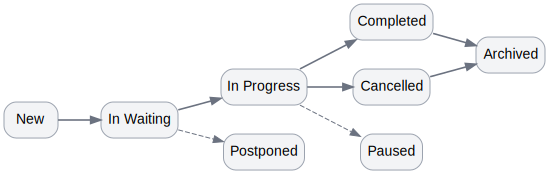

In [ ]:
# Cell 5 — Status Transition Diagram (robust: Graphviz with NetworkX fallback)

# Define the state machine once so both renderers can use it
STATUSES = [
    "New", "In Waiting", "In Progress", "Completed",
    "Cancelled", "Archived", "Postponed", "Paused"
]

# Solid (standard) transitions
EDGES = [
    ("New", "In Waiting"),
    ("In Waiting", "In Progress"),
    ("In Progress", "Completed"),
    ("In Progress", "Cancelled"),
    ("Completed", "Archived"),
    ("Cancelled", "Archived"),
]

# Dashed (optional) transitions
OPTIONAL_EDGES = [
    ("In Waiting", "Postponed"),  # user defers before start
    ("In Progress", "Paused"),    # user temporarily halts execution
]

def render_with_graphviz():
    from graphviz import Digraph
    from IPython.display import display

    dot = Digraph(format="png")
    dot.attr(rankdir="LR", concentrate="true", nodesep="0.4", ranksep="0.6")

    node_style = {
        "shape": "box",
        "style": "rounded,filled",
        "fillcolor": "#f3f4f6",
        "color": "#9ca3af",
        "fontname": "Helvetica"
    }

    for s in STATUSES:
        dot.node(s, s, **node_style)

    for a, b in EDGES:
        dot.edge(a, b, color="#6b7280", penwidth="1.6")

    for a, b in OPTIONAL_EDGES:
        dot.edge(a, b, color="#6b7280", style="dashed")

    display(dot)

def render_with_networkx():
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.DiGraph()
    G.add_nodes_from(STATUSES)
    G.add_edges_from(EDGES)
    G.add_edges_from(OPTIONAL_EDGES)

    # Layout & styling
    pos = nx.spring_layout(G, seed=42, k=1.2)
    plt.figure(figsize=(10, 6))
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="#f3f4f6", edgecolors="#9ca3af")
    nx.draw_networkx_labels(G, pos, font_size=10)
    # Solid edges
    nx.draw_networkx_edges(G, pos, edgelist=EDGES, width=1.6, edge_color="#6b7280", arrows=True, arrowsize=15)
    # Dashed edges
    nx.draw_networkx_edges(G, pos, edgelist=OPTIONAL_EDGES, width=1.2, style="dashed", edge_color="#6b7280", arrows=True, arrowsize=15)
    plt.title("Task Status Transitions (fallback renderer)")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# Try Graphviz; fallback gracefully if it's not installed or dot isn't available
try:
    render_with_graphviz()
except Exception as e:
    print("Graphviz rendering unavailable, using NetworkX fallback.\nReason:", e)
    render_with_networkx()


### Status Descriptions

*   **New:** Task has just been created and not yet scheduled.
*   **In Waiting:** Task is scheduled but its execution date/time has not arrived.
*   **In Progress:** Task is currently being executed.
*   **Completed:** Task has been successfully finished.
*   **Cancelled:** Execution was stopped by the user or the system.
*   **Archived:** Completed or cancelled tasks are moved here for historical storage.

### Optional transitions:

*   From **In Waiting** → **Postponed** if the user wants to shift the task.
*   From **In Progress** → **Paused** if execution is temporarily halted.




